In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive')

data = pd.read_csv('/content/gdrive/My Drive/calories.csv')
dataTime = pd.read_csv('/content/gdrive/My Drive/calories_id.csv')

print(data, dataTime)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
            Item  TimeId  Calories   Date New
0           Dosa     1.0     400.0   1/1/2024
1    Corn Flakes     1.0     250.0   1/1/2024
2    Sambar Rice     2.0     220.0   1/1/2024
3      Curd Rice     2.0     380.0   1/1/2024
4     Potato Fry     2.0     250.0   1/1/2024
..           ...     ...       ...        ...
110     Snickers     3.0     150.0  1/15/2024
111    Curd Rice     4.0     200.0  1/15/2024
112         Milk     4.0     150.0  1/15/2024
113       Banana     4.0      75.0  1/15/2024
114          NaN     NaN       NaN        NaN

[115 rows x 4 columns]    timeId       time
0       1  Breakfast
1       2      Lunch
2       3      Snack
3       4     Dinner


In [6]:
#write a command to see what type of columns are present

data.info()

dataTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Item      114 non-null    object 
 1   TimeId    114 non-null    float64
 2   Calories  114 non-null    float64
 3   Date New  114 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   timeId  4 non-null      int64 
 1   time    4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [9]:
#show only the first 15 rows of the data

data.head(15)


,Item,TimeId,Calories,Date New
0,Dosa,1.0,400.0,1/1/2024
1,Corn Flakes,1.0,250.0,1/1/2024
2,Sambar Rice,2.0,220.0,1/1/2024
3,Curd Rice,2.0,380.0,1/1/2024
4,Potato Fry,2.0,250.0,1/1/2024
5,Milk,3.0,150.0,1/1/2024
6,Wrap,4.0,350.0,1/1/2024
7,Milk,4.0,150.0,1/1/2024
8,Dosa,1.0,400.0,1/2/2024
9,Corn Flakes,1.0,250.0,1/2/2024


In [69]:
#convert datenew column object to date or datetime type

data['Date New'] =  data['Date New'].apply(pd.to_datetime)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Item      114 non-null    object        
 1   TimeId    114 non-null    float64       
 2   Calories  114 non-null    float64       
 3   Date New  114 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.7+ KB


In [95]:
#combine calories and time day table with merge

combineddata = data.merge(dataTime, left_on='TimeId', right_on='timeId')
combineddata.drop('timeId', axis=1, inplace=True)
#combineddata.drop('TimeId', axis=1, inplace=True)

combineddata.head()

,Item,TimeId,Calories,Date New,time
0,Dosa,1.0,400.0,2024-01-01,Breakfast
1,Corn Flakes,1.0,250.0,2024-01-01,Breakfast
2,Dosa,1.0,400.0,2024-01-02,Breakfast
3,Corn Flakes,1.0,250.0,2024-01-02,Breakfast
4,Bread,1.0,250.0,2024-01-03,Breakfast


In [72]:
dataBreakfast = combineddata[combineddata['time'] == 'Breakfast']
dataBreakfast.head(5)

,Item,TimeId,Calories,Date New,time
0,Dosa,1.0,400.0,2024-01-01,Breakfast
1,Corn Flakes,1.0,250.0,2024-01-01,Breakfast
2,Dosa,1.0,400.0,2024-01-02,Breakfast
3,Corn Flakes,1.0,250.0,2024-01-02,Breakfast
4,Bread,1.0,250.0,2024-01-03,Breakfast


In [40]:
dataCalories250AboveLunch = combineddata[(combineddata['time'] == 'Lunch') & (combineddata['Calories'] > 250)]
dataCalories250AboveLunch

,Item,TimeId,Calories,Date New,time
26,Curd Rice,2.0,380.0,2024-01-01,Lunch
29,Curd Rice,2.0,380.0,2024-01-02,Lunch
32,Curd Rice,2.0,380.0,2024-01-03,Lunch
35,Curd Rice,2.0,380.0,2024-01-04,Lunch
38,Curd Rice,2.0,380.0,2024-01-05,Lunch
40,Pizza,2.0,400.0,2024-01-06,Lunch
43,Curd Rice,2.0,380.0,2024-01-07,Lunch
45,Curd Rice,2.0,380.0,2024-01-08,Lunch
47,Curd Rice,2.0,380.0,2024-01-09,Lunch
49,Fried Rice,2.0,350.0,2024-01-11,Lunch


In [105]:
# Soma de calorias  consumidas em cada refeição
combineddata.groupby('time')['Calories'].sum()

,Calories
time,
Breakfast,6650.0
Dinner,6175.0
Lunch,9150.0
Snack,2850.0


In [46]:
# Número de refeições por dia da semana
combineddata['Dia da Semana'] = combineddata['Date New'].dt.day_name()
combineddata.groupby('Dia da Semana')['time'].count()

,time
Dia da Semana,
Friday,17
Monday,24
Saturday,17
Sunday,16
Thursday,16
Tuesday,16
Wednesday,8


In [98]:
# Calorias máximas consumidas em cada refeição:
combineddata.groupby('time')['Calories'].max()


,Calories
time,
Breakfast,400.0
Dinner,400.0
Lunch,400.0
Snack,150.0


In [104]:
combineddata.sort_values(by='Calories', ascending=False)

,Item,TimeId,Calories,Date New,time
0,Dosa,1.0,400.0,2024-01-01,Breakfast
8,Dosa,1.0,400.0,2024-01-05,Breakfast
92,Dosa,4.0,400.0,2024-01-06,Dinner
58,Pizza,2.0,400.0,2024-01-15,Lunch
19,Dosa,1.0,400.0,2024-01-13,Breakfast
...,...,...,...,...,...
102,Banana,4.0,75.0,2024-01-11,Dinner
91,Banana,4.0,75.0,2024-01-05,Dinner
110,Banana,4.0,75.0,2024-01-14,Dinner
98,Banana,4.0,75.0,2024-01-08,Dinner


In [83]:
combineddataValores = combineddata['Item'].value_counts()
combineddataValores

,count
Item,
Milk,27
Curd Rice,18
Corn Flakes,8
Banana,7
Dosa,6
Sambar Rice,6
Bread,4
Smoothie,4
Potato Fry,3


In [84]:
uniqueItems = combineddata['Item'].unique()
uniqueItems

array(['Dosa', 'Corn Flakes', 'Bread', 'Smoothie', 'Poha', 'Vermicelli',
       'Puttu', 'Sambar Rice', 'Curd Rice', 'Potato Fry', 'Rasam Rice',
       'Carrot Veggies', 'Beans', 'Tamarind Rice', 'Chips', 'Pizza',
       'Cake', 'Cabbage', 'Fried Rice', 'Milk', 'Snickers', 'Dates',
       'Wrap', 'Pasta', 'Banana', 'Momos'], dtype=object)

In [86]:
uniqueDays = combineddata['Date New'].nunique()
uniqueDays

14

In [97]:
map={'Calories': 'intake', 'time': 'time_of_day'}
novo_combineddata = combineddata.rename(columns=map)
novo_combineddata.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,Item,TimeId,intake,Date New,time_of_day
0,Dosa,1.0,400.0,2024-01-01,Breakfast
1,Corn Flakes,1.0,250.0,2024-01-01,Breakfast
2,Dosa,1.0,400.0,2024-01-02,Breakfast
3,Corn Flakes,1.0,250.0,2024-01-02,Breakfast
4,Bread,1.0,250.0,2024-01-03,Breakfast


In [103]:
# comapre o aumento de claoria do dia 10 para o dia 11
aggdata=novo_combineddata.groupby('Date New')['intake'].sum().reset_index()

aggdata['valor_anterior']=aggdata['intake'].shift(1)
aggdata['porcentagem_aumento']=((aggdata['intake']-aggdata['valor_anterior'])/aggdata['valor_anterior'])*100

aggdata = aggdata.fillna(0)

aggdata = aggdata.round(2)

aggdata


,Date New,intake,valor_anterior,porcentagem_aumento
0,2024-01-01,2150.0,0.0,0.00
1,2024-01-02,2130.0,2150.0,-0.93
2,2024-01-03,1750.0,2130.0,-17.84
3,2024-01-04,2055.0,1750.0,17.43
4,2024-01-05,2175.0,2055.0,5.84
5,2024-01-06,1700.0,2175.0,-21.84
6,2024-01-07,1530.0,1700.0,-10.00
7,2024-01-08,1605.0,1530.0,4.90
8,2024-01-09,1600.0,1605.0,-0.31
9,2024-01-11,1225.0,1600.0,-23.44


In [114]:
# Calcula a soma de 'intake' (calorias) por dia
aggdata2 = novo_combineddata.groupby('Date New')['intake'].sum().reset_index()

# Calcula a porcentagem de mudança em relação ao dia anterior
aggdata2['porcentagem_aumento'] = aggdata2['intake'].pct_change() * 100

aggdata2.head()

,Date New,intake,porcentagem_aumento
0,2024-01-01,2150.0,NaN
1,2024-01-02,2130.0,-0.930233
2,2024-01-03,1750.0,-17.840376
3,2024-01-04,2055.0,17.428571
4,2024-01-05,2175.0,5.839416


In [115]:
def categorizar_refeicao(refeicao):
  if 'Snack' in refeicao:
    return 'Small snack'
  else:
    return 'Big Meal'

combineddata['meals'] = combineddata['time'].apply(categorizar_refeicao)

combineddata[combineddata['time'] == 'Snack']

,Item,TimeId,Calories,Date New,time,meals
59,Milk,3.0,150.0,2024-01-01,Snack,Small snack
60,Milk,3.0,150.0,2024-01-02,Snack,Small snack
61,Milk,3.0,150.0,2024-01-03,Snack,Small snack
62,Milk,3.0,150.0,2024-01-04,Snack,Small snack
63,Snickers,3.0,150.0,2024-01-04,Snack,Small snack
64,Milk,3.0,150.0,2024-01-05,Snack,Small snack
65,Dates,3.0,100.0,2024-01-05,Snack,Small snack
66,Milk,3.0,150.0,2024-01-06,Snack,Small snack
67,Dates,3.0,100.0,2024-01-06,Snack,Small snack
68,Milk,3.0,150.0,2024-01-07,Snack,Small snack


In [116]:
combineddata['meals'] = np.where(combineddata['time'].str.contains('Snack'), 'Small snack', 'big Meal')

combineddata[combineddata['time'] == 'Snack']

,Item,TimeId,Calories,Date New,time,meals
59,Milk,3.0,150.0,2024-01-01,Snack,Small snack
60,Milk,3.0,150.0,2024-01-02,Snack,Small snack
61,Milk,3.0,150.0,2024-01-03,Snack,Small snack
62,Milk,3.0,150.0,2024-01-04,Snack,Small snack
63,Snickers,3.0,150.0,2024-01-04,Snack,Small snack
64,Milk,3.0,150.0,2024-01-05,Snack,Small snack
65,Dates,3.0,100.0,2024-01-05,Snack,Small snack
66,Milk,3.0,150.0,2024-01-06,Snack,Small snack
67,Dates,3.0,100.0,2024-01-06,Snack,Small snack
68,Milk,3.0,150.0,2024-01-07,Snack,Small snack


In [122]:
# rankear a comida mais calorica por cada perido

rankdata = novo_combineddata.groupby(['time_of_day', 'Item'])['intake'].sum().reset_index()

rankdata['rank'] = rankdata.groupby('time_of_day')['intake'].rank(method='first' ,ascending=False)

rankdata.head()

,time_of_day,Item,intake,rank
0,Breakfast,Bread,1000.0,3.0
1,Breakfast,Corn Flakes,2000.0,1.0
2,Breakfast,Dosa,1600.0,2.0
3,Breakfast,Poha,400.0,6.0
4,Breakfast,Puttu,600.0,5.0


<Axes: xlabel='time_of_day'>

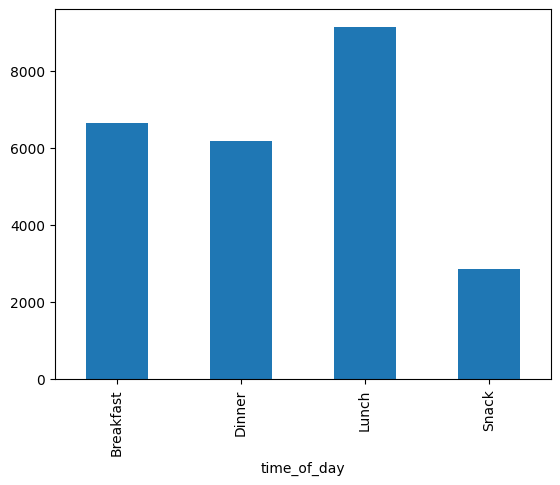

In [129]:
pltdata=novo_combineddata.groupby('time_of_day')['intake'].sum()

pltdata.plot(kind='bar')

#plt.bar(pltdata.index, pltdata.values)


<Axes: xlabel='time_of_day'>

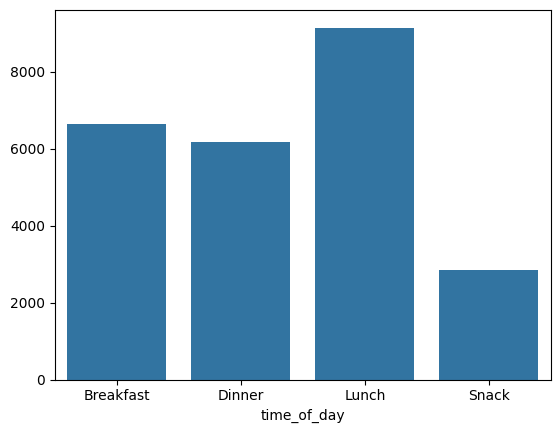

In [130]:
snsdata = novo_combineddata.groupby('time_of_day')['intake'].sum()

sns.barplot(x=snsdata.index, y=snsdata.values)